# Project: Climate Change - Cluster and Topic Analysis

Topics discussed:
- Applied K-means clustering to all the articles 
- Applied LDA topic modeling to all the articles 

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from wordcloud import WordCloud 
from IPython.display import Image
from nltk.corpus import stopwords
import string 
from collections import Counter

# Clustering using the article_body_text

In [2]:
df = pd.read_csv("_article_metadata.csv", sep = '\t')

In [3]:
df.head()

,article_title,article_body_text,posting_date_time,authors
0,Teetering on a tipping point: dangerous climat...,We are seeing the first signs of dangerous cli...,"February 5, 2012 9.35pm EST",Carlos Duarte
1,Blue Acceleration: our dash for ocean resource...,Humans are leaving a heavy footprint on the Ea...,"January 24, 2020 11.13am EST",Robert Blasiak
2,Climate shenanigans at the ends of the Earth: ...,There is no doubt that 2016 has been a record-...,"December 7, 2016 8.51pm EST",Nerilie Abram
3,Will climate change ever have its Sandy Hook m...,It’s easy to bash America.Externally Americans...,"December 29, 2012 10.21pm EST",Matthew Bailes
4,February’s global temperature spike is a wake-...,Global temperatures for February showed a dist...,"March 15, 2016 11.49pm EDT","Steven Sherwood, Stefan Rahmstorf"


### Definition of Stopwords

In [4]:
global_stopwords = stopwords.words("english")
local_stopwords = [c for c in string.punctuation] +\
                  ['’', '...', '``', '–', "''", '“', '”', "'m", "'re", "'s", "amp", "n't", 'climate', 'get', 'would',
                      'also', 'one', 'like', 'may', 'need', 'even', 'new', 'many', 'could', 'much', 'read', 'first', 'two',
                      'less', 'way', 'example', 'make', 'use', 'around', 'year', 'years', 'time', 'change', 'changes']

In [5]:
vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words=global_stopwords+local_stopwords, max_df=0.7)
X = vectorizer.fit_transform(df.article_body_text)

### Defining number of clusters

In [6]:
k = 3
kmeans = KMeans(n_clusters = k, random_state=0)
kmeans

KMeans(n_clusters=3, random_state=0)

In [7]:
%time kmeans.fit(X)

CPU times: user 51 s, sys: 379 ms, total: 51.4 s
Wall time: 54.5 s


KMeans(n_clusters=3, random_state=0)

In [8]:
kmeans.cluster_centers_

array([[7.72016974e-05, 6.48776454e-03, 0.00000000e+00, ...,
        3.67069139e-05, 4.03227462e-05, 0.00000000e+00],
       [1.36622643e-04, 1.18490019e-02, 6.57835951e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.03232222e-05, 5.96498573e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.36169093e-05]])

### New column in DF called clusters

In [9]:
df["cluster"] = kmeans.labels_

In [10]:
df[["article_body_text", "cluster"]]

,article_body_text,cluster
0,We are seeing the first signs of dangerous cli...,1
1,Humans are leaving a heavy footprint on the Ea...,1
2,There is no doubt that 2016 has been a record-...,1
3,It’s easy to bash America.Externally Americans...,0
4,Global temperatures for February showed a dist...,1
...,...,...
3433,There is a strange and troubled kind of intima...,0
3434,Here is a great “what-if”: if we (the human ra...,1
3435,"Recently Marie Claire, a major fashion magazi...",0
3436,Disaster was narrowly averted after America’s ...,0


### Taking a look at how balanced the clusters are

In [11]:
df.cluster.value_counts()

0    1796
2     842
1     800
Name: cluster, dtype: int64

In [12]:
counts = df.cluster.value_counts()

In [13]:
df[df.cluster == counts.idxmin()].sample(10, random_state=1)[["article_body_text", "cluster"]]

,article_body_text,cluster
25,We’ve heard the predictions of how greenhouse ...,1
2215,Hot weather has forced dozens of commercial fl...,1
738,"Greenland is the largest island on Earth, and ...",1
3157,2016 continues to be a momentous year for Aust...,1
1046,We can learn a lot about climate change from V...,1
3301,The world is experiencing its third mass coral...,1
2331,The world record for the longest non-stop unpo...,1
1847,The Great Barrier Reef has been in the spotlig...,1
348,Many species have dubious futures in the face ...,1
2775,A new study published today suggests that the ...,1


In [14]:
df["words"] = df.article_body_text.apply(lambda x: nltk.word_tokenize(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))

def get_counter(dataframe, stopwords=[]):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            if word not in stopwords:
                word_set.add(word)
            
        counter.update(word_set)
        
    return counter

In [15]:
def display_wc_cluster(cluster_num):
    image_file_name = "resources/wc_cluster.png"
    wc_c1 = WordCloud(background_color="white", max_words=100, width=800, height=500)
    wc_c1.generate_from_frequencies(get_counter(df[df.cluster == cluster_num], global_stopwords+local_stopwords))
    wc_c1.to_file(image_file_name)
    display(Image(filename=image_file_name))
    

## Word Clouds from Clusters

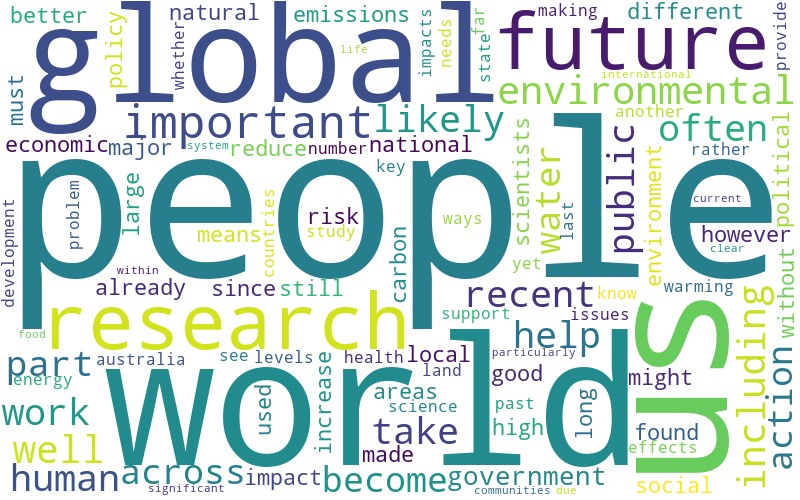

In [16]:
display_wc_cluster(0)

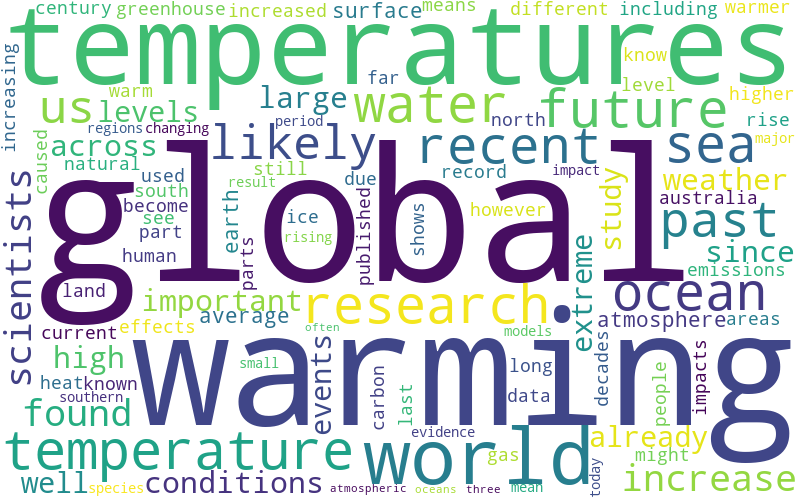

In [17]:
display_wc_cluster(1)

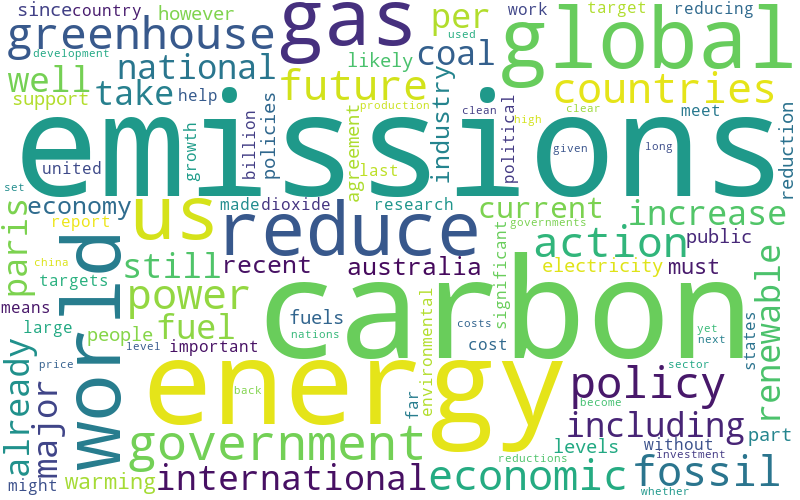

In [18]:
display_wc_cluster(2)

## Conclusion 

- Cluster 0 :  Cluster of articles talking about the climate changes and impacts on different people across the world 
- Cluster 1 :  Cluster of articles talking about the climate changes happening becasuse of carbon emissions 
- Cluster 2 :  Cluster of articles talking about the climate changes and impacts on sea/ocean

# LDA Topic Analysis - Finding the abstract topics in the articles

### Number of topics defined

In [19]:
num_topics = 2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Initialize a model object for LDA topic modeling

In [20]:
lda = LDA(n_components=num_topics, random_state=0)     # LDA uses randomness to get a probability distribution

### Fit the model using the input data

In [21]:
lda.fit(X)

LatentDirichletAllocation(n_components=2, random_state=0)

### Examine the output of topic modeling

In [22]:
lda.components_

array([[ 0.81205436, 26.64910215,  0.5513294 , ...,  0.56451153,
         0.57119708,  0.5775532 ],
       [ 0.50353016,  0.50464247,  0.50129747, ...,  0.50141409,
         0.50122257,  0.50127224]])

In [23]:
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("***Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [24]:
show_topics(lda, vectorizer.get_feature_names(), 4)

***Topic 0:
114.59 * emissions + 107.09 * carbon + 87.71 * australia + 87.43 * energy

***Topic 1:
0.51 * anemonefish + 0.51 * saini + 0.51 * anemones + 0.51 * pier



### Topic Model Visualization

In [25]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [26]:
pyLDAvis.sklearn.prepare(lda, X, vectorizer)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
